In [1]:
# !pip install mesa

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

%load_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## To-Do:

* Optimierung: kriegen wirs besser hin. Benchmarks in Netlogo? 
* Faithfulness: Inwieweit implementieren wir eigentlich dasselbe wie in der Referenz/im Originalpaper? Antwort: garnicht, Strategien sind GEWICHTE!
* Agent.py https://agentpy.readthedocs.io/en/latest/
* https://mesa.readthedocs.io/en/stable/
* Syntax für Gruppen? Gruppensyntax als Klasse? (Visualisierung als Methode)
* Visualierung: phylogenetic tree, bubblechart, treemap
* **Gruppen umsetzen**
* **Multi-level mesa** – Verstehen was hier passiert.
* UMAP embedding von Strategien, Visualisierung Bokeh, Faerun?
* Evaluierungsfunktionen, visualisierungen
* ABMs in R?
* Gitlab der Uni verwenden? 
* Package-integration mit Mesa recherchieren
* Spione
* bayesian updating statt vektor-vorraussage. Scikit-learn.
* https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy
* ABM'S und neuronale Netzwerke | Agents reinforcement-learning.
* https://github.com/fastai/nbdev oder Sphinx oder was anderes?
* Oh Nein! – https://github.com/danielxu05/mesa/blob/main/examples/el_farol/el_farol/el_farol.ipynb

In [3]:
# # Gruppenstruktur:

# # [[[a, b], [c, d]], e, f]

# def return_agentset(group_structure, n,dictionary):
#     for x in range(0,n):
#         group_structure.append(dictionary)
#     return group_structure


# group_structure = []

# group_structure = return_agentset(group_structure, 5,{'test':10})
# group_structure = return_agentset(group_structure, 5,{'test':5, 'group_members'})

# group_structure

<IPython.core.display.Javascript object>

In [4]:
# data = []
# data.extend([0.01 for x in range(0, 10)]) # add singular actors
# data

<IPython.core.display.Javascript object>

In [5]:
# [{"id": x, "datum": 0.01} for x in range(0, 20)]
# !pip install circlify

<IPython.core.display.Javascript object>

In [6]:
def return_my_group(n_groups, n_members, aggregation_function):

    """Returns a list of group-dictionaries, which can be passed to a mesa-model and plotted as a bubble-chart

    :param n_groups: The number of groups to return.
    :type n_groups: int
    :param n_members: The number of members per group.
    :type n_members: int
    :param n_members: The aggregation-function which mesa ought to associate with the group.
    :type n_members: str

    :return: A list of dictionaries.
    :rtype: list
    """
    group_list = []
    for x in range(0, n_groups):
        group_list.append(
            {
                "aggregation_function": aggregation_function,
                "datum": n_members * 0.01,
                "children": [0.01 for x in range(0, n_members)],
            }
        )
    return group_list


group_data = []
group_data.extend([0.01 for x in range(0, 30)])  # add singular actors
group_data.extend(return_my_group(7, 3, "majoritarian_voting"))  # add some groups
group_data.extend(return_my_group(3, 10, "majoritarian_voting"))  # add some groups


group_data

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.03,
  'children': [0.01, 0.01, 0.01]},
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.03,
  'children': [0.01, 0.01, 0.01]},
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.03,
  'children': [0.01, 0.01, 0.01]},
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.03,
  'children': [0.01, 0.01, 0.01]},
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.03,
  'children': [0.01, 0.01, 0.01]},
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.03,
  'children': [0.01, 0.01, 0.01]},
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.03,
  'children': [0.01, 0.01, 0.01]},
 {'aggregation_function': 'majoritarian_voting',
  'datum': 0.1,
  'children': [0.0

<IPython.core.display.Javascript object>

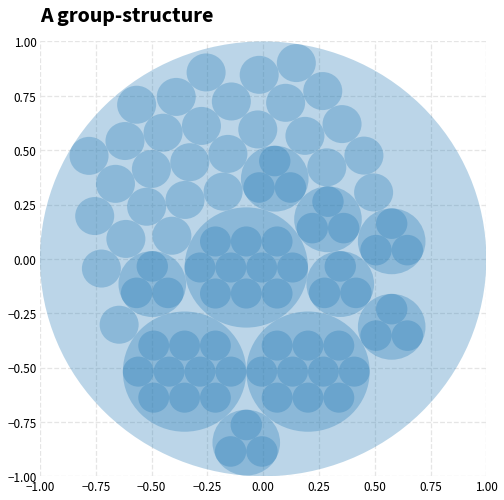

<IPython.core.display.Javascript object>

In [147]:
from pprint import pprint as pp
import circlify as circ

circles = circ.circlify(group_data, show_enclosure=True)


fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use("opinions.mplstyle")


def plot_bubbles(circles, labels=None, lim=None):
    """function displays circles with matplotlib, adapted from circlify"""
    if not labels:
        labels = range(len(circles))
    for circle, label in zip(circles, labels):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.3, linewidth=2, fill="#1a2340"))
    #         ax.text(x, y, label)
    enclosure = circ.enclose(circles)
    n = len(circles)
    if enclosure in circles:
        n = n - 1

    ax.set_title("A group-structure")
    if lim is None:
        lim = max(
            max(
                abs(circle.x) + circle.r,
                abs(circle.y) + circle.r,
            )
            for circle in circles
        )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.show()


plot_bubbles(circles, labels=None, lim=None)

In [157]:
# df = pd.json_normalize(group_data, sep="_", meta=["id"])

# display(df)
# # pp(df.to_dict())

<IPython.core.display.Javascript object>

In [158]:
# group_data[31]["children"]

<IPython.core.display.Javascript object>

In [164]:
def unpack_group_list(d, agent_count):

    if isinstance(d, float):
        agent_count += 1
        return agent_count

    elif isinstance(d, dict):
        print("parsing dict")
        agent_count += 1

        for j in d["children"]:
            agent_count = unpack_group_list(j, agent_count)
        #             agent_count += 1
        return agent_count


# global agent_count
agent_count = 0

for i in group_data:
    agent_count = unpack_group_list(i, agent_count)
    print(agent_count)


#     if
#     print(i)
#     a = MyAgent(i, self, memory, n_strategies, threshold, self.history)
#     self.schedule.add(a)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
parsing dict
34
parsing dict
38
parsing dict
42
parsing dict
46
parsing dict
50
parsing dict
54
parsing dict
58
parsing dict
69
parsing dict
80
parsing dict
91


<IPython.core.display.Javascript object>

In [253]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector


class MyAgent(Agent):
    def __init__(
        self,
        name,
        model,
        memory=10,
        n_strategies=10,
        threshold=50,
        history=[0, 0],
        is_group=False,
        in_group=False,
        group_members=[],
    ):

        super().__init__(name, model)

        self.name = name
        self.memory = memory
        self.n_strategies = n_strategies
        self.threshold = threshold
        self.history = history

        self.is_group = (is_group,)
        self.in_group = (in_group,)
        self.group_members = group_members

        self.strategies = [self.random_strategy() for x in range(0, n_strategies)]
        self.best_strategy = self.strategies[0]
        self.best_strategy_no = 0
        self.update_strategies()

        current_prediction = self.predict_attendance(
            self.best_strategy, self.model.history[-self.memory * 2 :]
        )
        #         print(current_prediction) # predictions can be negative...

        if current_prediction <= threshold:
            self.should_i_attend = True
        else:
            self.should_i_attend = False

    #         print(self.random_strategy(self.memory))

    def random_strategy(self):
        return list(1 - np.random.rand(self.memory) * 2)

    def predict_attendance(self, strategy, subhistory):
        return 100 * strategy[0] + np.sum(
            [weight * week for weight, week in zip(strategy, subhistory)]
        )

    def update_strategies(self):
        best_score = self.memory * 100 + 1
        sub_history = self.model.history[-self.memory * 2 :]
        for strategy_no, this_strategy in enumerate(self.strategies):
            #             print("strategy_n ", strategy_no, "\n")
            score = 0

            for week in range(0, self.memory):  # bit unpythonic?
                prediction = self.predict_attendance(
                    this_strategy, sub_history[week : (week + self.memory)]
                )
                score = score + np.abs(sub_history[week - 1] - prediction)
            #                 print("this_strategies_score", score)

            if score <= best_score:
                best_score = score
                self.best_strategy = this_strategy
                self.best_strategy_no = strategy_no

    #             print("best_strategy ", self.best_strategy_no)

    #             return self

    def step(self):

        
        
        
        
        
        #
        self.update_strategies()
        #         if self.name == 0:
        #             print(self.best_strategy_no)
        #             print(self.best_strategy)
        #         print(self.model.history[-self.memory :])
        #         print(self.best_strategy_no)

        current_prediction = self.predict_attendance(
            self.best_strategy, self.model.history[-self.memory * 2 :]
        )
        if current_prediction <= self.threshold:
            self.should_i_attend = True
        else:
            self.should_i_attend = False


class MyModel(Model):
    def __init__(self, agent_initiation, memory, n_strategies, threshold):
        super().__init__()
        self.schedule = RandomActivation(self)
        self.memory = memory
        self.n_strategies = n_strategies
        self.threshold = threshold

        self.history = list(np.random.rand(memory * 2) * 100)
        self.attendance = self.history[-1]

        if isinstance(agent_initiation, int):  # Do we need this?
            for i in range(n_agents):
                a = MyAgent(
                    i, self, memory, n_strategies, threshold, self.history
                )  # Do we need this?
                self.schedule.add(a)

        elif isinstance(agent_initiation, list):
            agent_count = 0

            for i in agent_initiation:
                agent_count = self.unpack_group_list(i, agent_count, 0)

            print("set up groups")

        agent_reporters = {
            "should_i_attend": lambda a: getattr(a, "should_i_attend", None),
            "best_strategy": lambda a: getattr(a, "best_strategy", None),
            "best_strategy_no": lambda a: getattr(a, "best_strategy_no", None),
        }

        model_reporters = {
            "attendance": lambda a: getattr(a, "attendance", None),
        }

        self.datacollector = DataCollector(
            model_reporters=model_reporters, agent_reporters=agent_reporters
        )

    def unpack_group_list(self, d, agent_count, top_group):

        if isinstance(d, float):
            # Add atomic agent:
            in_group = False
            if top_group != 0:
                in_group = True

            a = MyAgent(
                agent_count,
                self,
                self.memory,
                self.n_strategies,
                self.threshold,
                self.history,
                is_group=False,
                in_group=in_group,
            )
            self.schedule.add(a)
            # append agents in groups to their respective groups:
            if top_group != 0:
                model.schedule.agents[top_group].group_members.append(agent_count)

            agent_count = agent_count + 1
            return agent_count

        elif isinstance(d, dict):
            print("parsing dict")

            in_group = False
            if top_group != 0:
                print(top_group)
                in_group = True

            agent_count = agent_count + 1
            a = MyAgent(
                agent_count,
                self,
                self.memory,
                self.n_strategies,
                self.threshold,
                self.history,
                is_group=True,
                in_group=in_group,
                group_members=[],
            )
            self.schedule.add(a)
            this_top_group = agent_count
            agent_count = agent_count + 1

            for j in d["children"]:
                agent_count = self.unpack_group_list(j, agent_count, this_top_group)

            return agent_count

    def step(self):
        self.attendance = np.sum(
            [int(a.should_i_attend) for a in model.schedule.agents]
        )

        self.history.append(self.attendance)
        self.datacollector.collect(self)
        self.schedule.step()


model = MyModel(group_data, memory=10, n_strategies=10, threshold=60)


# Do the run:
for t in tqdm.tqdm_notebook(range(400)):
    model.step()

parsing dict
parsing dict
parsing dict
parsing dict
parsing dict
parsing dict
parsing dict
parsing dict
parsing dict
parsing dict
set up groups


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [252]:
[model.schedule.agents[x].__dict__["group_members"] for x in range(0, 90)]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

<IPython.core.display.Javascript object>

In [228]:
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

<IPython.core.display.Javascript object>

(0.0, 100.0)

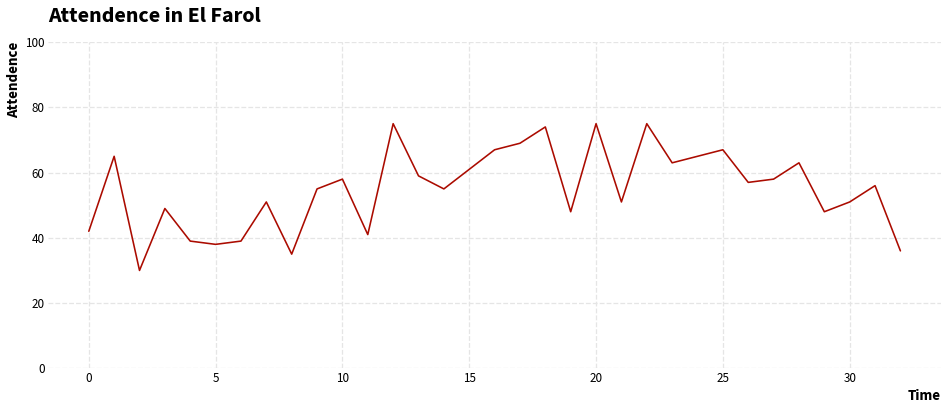

<IPython.core.display.Javascript object>

In [229]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.style.use("opinions.mplstyle")
plt.plot(model_df["attendance"], linewidth=1.6, c="#ab0b00", alpha=1)
plt.xlabel("Time")
plt.ylabel("Attendence")
plt.title("Attendence in El Farol")
plt.ylim(0,100)
# fig.suptitle("Attendence in El Farol")


In [207]:
agent_df

should_i_attend  \
Step AgentID                    
0    0                   True   
     1                   True   
     2                   True   
     3                   True   
     4                   True   
...                       ...   
59   86                  True   
     87                  True   
     88                  True   
     89                  True   
     90                 False   

                                                  best_strategy  \
Step AgentID                                                      
0    0        [-0.0862216299282208, 0.8456604463240527, 0.30...   
     1        [-0.8486952906555745, -0.02722658890013996, 0....   
     2        [0.46953074218346935, -0.642341785524988, -0.6...   
     3        [-0.1887611195912604, 0.10355618365042396, -0....   
     4        [-0.07232261236314219, 0.7734290290696655, -0....   
...                                                         ...   
59   86       [0.43800801087772534, -0.04243922828124358, -0...   
     87       [-0.15628761151632053, 0.5632764980527942, -0....   
     88       [-0.441986841141494, 0.5946487157639917, 0.153...   
     89       [0.5266097406732912, -0.12756674297195825, 0.7...   
     90       [0.9927033358038175, -0.06504429046913063, -0....   

              best_strategy_no  
Step AgentID                    
0    0                       9  
     1                       4  
     2                       0  
     3                       6  
     4                       5  
...                        ...  
59   86                      0  
     87                      4  
     88                      7  
     89                      8  
     90                      8  

[4860 rows x 3 columns]

<IPython.core.display.Javascript object>

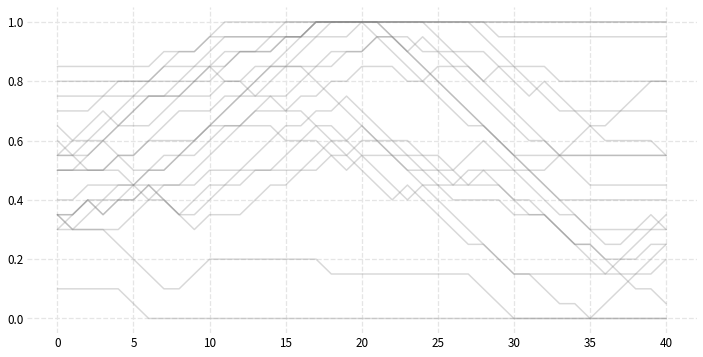

<IPython.core.display.Javascript object>

In [208]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "valid") / w


fig, ax = plt.subplots(figsize=(12, 6))
plt.style.use("opinions.mplstyle")
for agent_no in range(0, 20):
    agent_attendance = agent_df.iloc[
        agent_df.index.get_level_values("AgentID") == agent_no
    ]["should_i_attend"].astype(
        int
    )  # [0:200]

    plt.plot(moving_average(agent_attendance, 20), alpha=0.3, c="grey")